## Exporting: Example 01
Created by Brandon Tucker in 2023 <br> 
<br>
In this example, we will create contours as polygons based on the maximum flooding outputs from ADCIRC, <br> then export those polygons as a .shp file. This is the first step in Kalpana's downscaling process. <br> <br>
You can think of a contour as a shape that covers an area with a certain max flooding level. <br>
One of the main assumptions we make with Kalpana is that these areas have a constant flooding level.
<br> <br> For this example, we will study Hurricane Florence in 2018. <br>
**The following cell imports necessary packages and functions.**

In [1]:
import sys
#import Kalpana functions from github repository
sys.path.append(r'C:/Users/brand/Github/Kalpana')
from kalpana.export import *

#import additional functions used for this example
sys.path.append(r'C:/Users/brand/Github/Kalpana/examples')
from example_functions import *

First, let's take a look at the maxele.63.nc file, which is the primary input to Kalpana. <br>
This file contains maximum water level data as an output of ADCIRC. <br>
**The following cell creates a visualization of the maxele.63.nc file for Hurricane Florence.**
<br> <br> Note: understanding the functions to create these visualizations is not relevant to the operation of Kalpana.

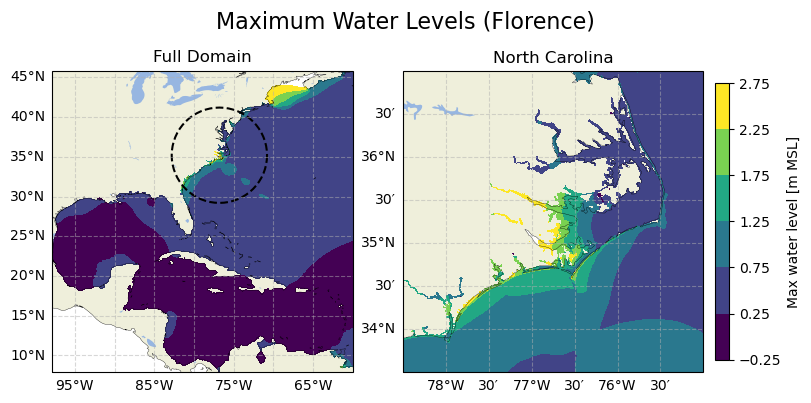

In [2]:
#plot the maximum water levels from a given maxele.63.nc file
#understanding these functions to create visualizations is not relevant to the operation of Kalpana

## path to netcdf file
nc = r'C:/Users/brand/Documents/Coastal/Kalpana/inputs/NC9_maxele.63.nc' 
## flooding levels to plot: min, max, step. creates 0.5 meter bins around each level
levels = [0, 3, 0.5]

plot_maxele(nc, levels)

Next, we will use the nc2shp() function to create contours based on these maximum water levels. <br>
**The following cell defines our parameters for the nc2shp() function.**

In [3]:
## path of the adcirc maxele output file, must be a netcdf file
ncFile = r'C:/Users/brand/Documents/Coastal/Kalpana/inputs/NC9_maxele.63.nc'

## name of the maxele variable to downscale. Always 'zeta_max' for downscaling
var = 'zeta_max'

## Contour levels. Min, Max and Step. Max IS included as in np.arange method. Values must be in vUnitOut vertical unit.
## from 0 to 3 meters (included) every 0.5
levels = [0, 3, 0.5]

## 'polyline' or 'polygon'
## we are creating polygons in this example
conType = 'polygon'

## complete path of the output file (*.shp or *.gpkg)
pathOut = r'C:/Users/brand/Documents/Coastal/Kalpana/export_examples/example01.shp'

## coordinate system of the output shapefile
epsgOut = 4326  # output in latitude and longitude, based on downscaling DEM

## input and output vertical units. For the momment only supported 'm' and 'ft'  
vUnitIn = 'm' ## Default 'm'
vUnitOut = 'm' ## Default 'ft'

## coordinate system of the adcirc input.
## Default is 4326 since ADCIRC uses latitude and longitude
epsgIn = 4326  

## complete path of the subdomain polygon kml or shapelfile, or list with the
## upper-left x, upper-left y, lower-right x and lower-right y coordinates. 
## the crs must be the same of the adcirc input file. 
subDomain = None  ## Default None

## True for export the mesh geodataframe and also save it as a shapefile. 
## for this example we are only exporting the contours, not the mesh.
exportMesh = False  ## Default False

## file name of the output mesh shapefile. Default None
meshName = None  ## Default None

## full path of the pickle file with the vertical difference between datums for each mesh node. 
dzFile = None  ## Default None

## threshold for using nearest neighbor interpolation to change datum. Points below this value won't be changed.
zeroDif = -20  ## Default -20

Now, let's call the nc2shp() function with the parameters we defined. <br>
**The following cell runs nc2shp() and visualizes the output contours.**
<br> <br>
Note that the output .shp file will also be saved to the path specified in the pathOut parameter.

Start exporting adcirc to shape


Compute contours using Dask: 100%|██████████| 15/15 [00:04<00:00,  3.37it/s]


    Ready with the contours extraction: 0.118 min
    Saving file: 0.029 min
Ready with exporting code after: 0.147 min


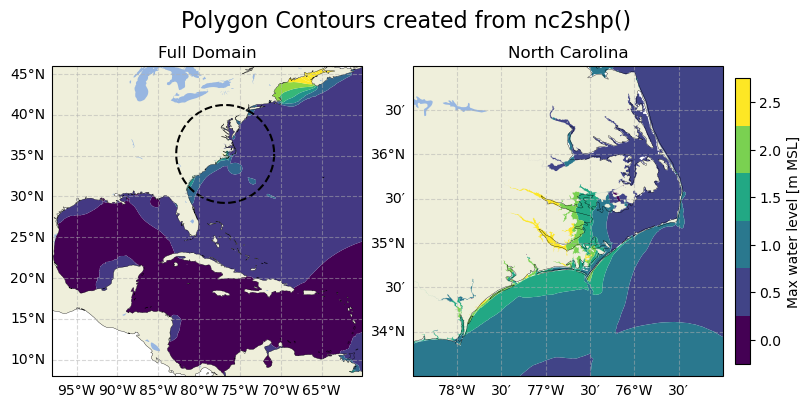

In [4]:
## call nc2shp() and store output as geodataframe
gdf = nc2shp(ncFile, var, levels, conType, pathOut, epsgOut, vUnitOut=vUnitOut, vUnitIn=vUnitIn, epsgIn=epsgIn,
           subDomain=subDomain, exportMesh=exportMesh, meshName=meshName, dzFile=dzFile, zeroDif=zeroDif)

## create plots of the output
plot_polygons(gdf, levels)

Finally, we can look at the original maximum flooding levels and the contours we generated side-by-side. <br>
**The following cell creates a comparison plot.**

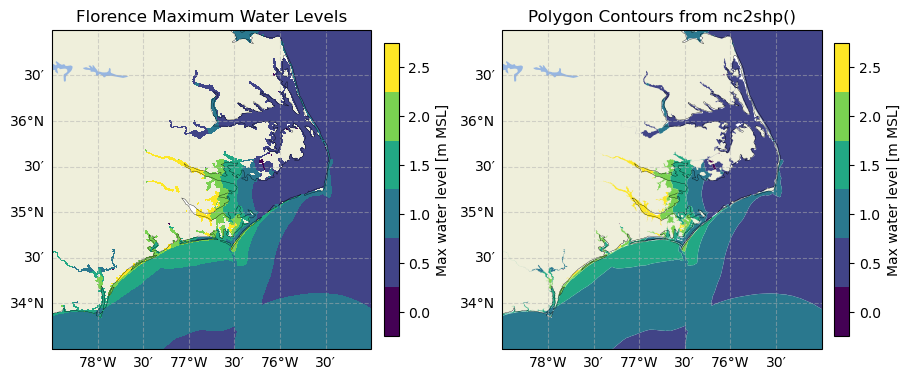

In [5]:
polygon_compare('C:/Users/brand/Documents/Coastal/Kalpana/inputs/NC9_maxele.63.nc', levels, gdf)

Good luck with Kalpana! See you in future examples! <br>